In [50]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145) 
  
# data (as pandas dataframes) 
X = statlog_heart.data.features 
y = statlog_heart.data.targets 

In [52]:
X

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cond = ['age', 'rest-bp', 'chest-pain', 'serum-chol', 'electrocardiographic', 'max-heart-rate', 
        'oldpeak', 'slope', 'major-vessels', 'thal']
X.loc[:, cond] = scaler.fit_transform(X.loc[:, cond])

/tmp/ipykernel_331730/3972061709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, cond] = scaler.fit_transform(X.loc[:, cond])


In [54]:
X

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal
0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.00
1,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.00
2,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.00
3,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.00
4,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,0.666667,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.080645,0.0,0.000000,1.00
266,0.312500,1.0,0.333333,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.000000,0.0,0.000000,1.00
267,0.562500,0.0,0.333333,0.433962,0.383562,0.0,1.0,0.625954,0.0,0.209677,0.5,0.000000,0.00
268,0.583333,1.0,1.000000,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.064516,0.5,0.000000,0.75


In [55]:
X.columns

Index(['age', 'sex', 'chest-pain', 'rest-bp', 'serum-chol',
       'fasting-blood-sugar', 'electrocardiographic', 'max-heart-rate',
       'angina', 'oldpeak', 'slope', 'major-vessels', 'thal'],
      dtype='object')

In [56]:
y = y.replace({2 : 0})
y

,heart-disease
0,0
1,1
2,0
3,1
4,1
...,...
265,1
266,1
267,1
268,1


In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [58]:
neigh = KNeighborsClassifier(n_neighbors = 25)
result_knn = list()
#std_knn = list()
mlp = MLPClassifier(hidden_layer_sizes = 4)
result_mlp = list()
#std_mlp = list()
bay = GaussianNB()
result_bay = list()
#std_bay = list()

In [59]:
y = np.array(y).reshape(-1,)

In [60]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle

warnings.filterwarnings("ignore", category=ConvergenceWarning)


for i in range(10):
    X, y = shuffle(X, y, random_state=42)
 
    result_knn.append(np.mean(cross_val_score(neigh, X, y, cv=10)))
    result_mlp.append(np.mean(cross_val_score(mlp, X, y, cv=10)))
    result_bay.append(np.mean(cross_val_score(bay, X, y, cv=10)))
result_knn = np.array(result_knn)
result_mlp = np.array(result_mlp)
result_bay = np.array(result_bay)

In [61]:
print(f"The accuracy for knn is {np.mean(result_knn)} +- {statistics.stdev(result_knn)}")
print(f"The accuracy for mlp is {np.mean(result_mlp)} +- {statistics.stdev(result_mlp)}")
print(f"The accuracy for bayesian classifier is {np.mean(result_bay)} +- {statistics.stdev(result_bay)}")

The accuracy for knn is 0.8266666666666665 +- 0.004552861460391586
The accuracy for mlp is 0.7666666666666666 +- 0.036330713505091775
The accuracy for bayesian classifier is 0.8414814814814815 +- 0.005465665091649087


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
y_pred_knn = neigh.fit(X_train, y_train).predict(X_test)
y_pred_mlp = mlp.fit(X_train, y_train).predict(X_test)
y_pred_bayes = bay.fit(X_train, y_train).predict(X_test)

In [63]:
from sklearn.metrics import roc_auc_score

print(f"AUC score KNN : {roc_auc_score(y_test, y_pred_knn)}")
print(f"AUC score MLP : {roc_auc_score(y_test, y_pred_mlp)}")
print(f"AUC score BAYES : {roc_auc_score(y_test, y_pred_bayes)}")

AUC score KNN : 0.7733516483516484
AUC score MLP : 0.7513736263736264
AUC score BAYES : 0.8296703296703297


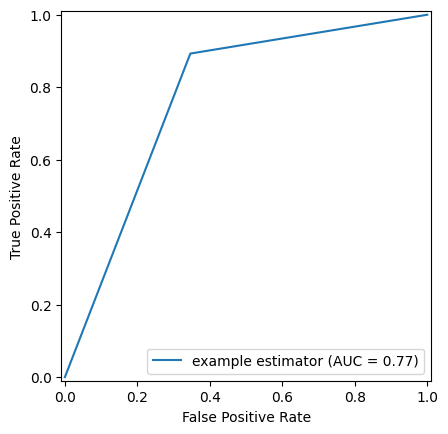

In [64]:
from sklearn import metrics 

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

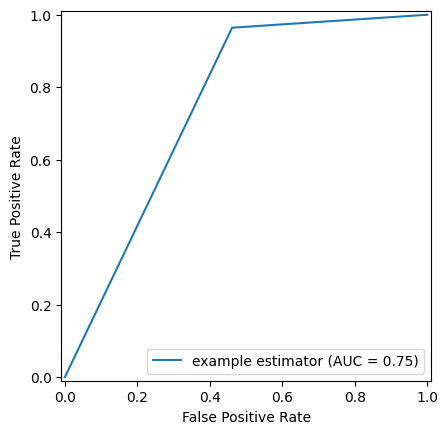

In [65]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_mlp)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

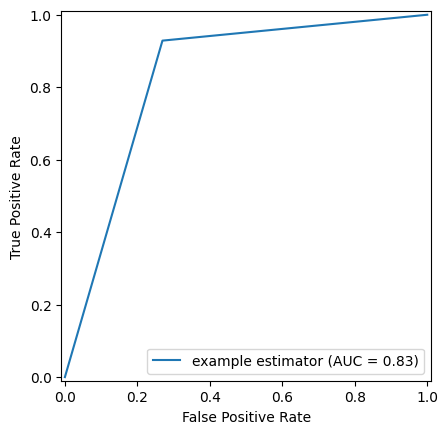

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_bayes)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

#### Analisando a curva ROC para o melhor modelo obtido com o KNN.

In [67]:
%%time

k_val = np.arange(start = 1, stop = 150, step = 1)

KNN_model = KNeighborsClassifier()

classifier = GridSearchCV(estimator = KNN_model, param_grid = {'n_neighbors' : k_val}, cv = 10)

classifier.fit(X = X_train, y = y_train)

best_param = classifier.best_params_
best_score = classifier.best_score_

CPU times: user 10.7 s, sys: 79.4 ms, total: 10.8 s
Wall time: 5.41 s


In [68]:
best_param, best_score

({'n_neighbors': 23}, 0.8471861471861472)

In [69]:
neigh_ = KNeighborsClassifier(n_neighbors = best_param['n_neighbors'])
neigh_.fit(X_train, y_train)
y_KNN = neigh_.predict(X_test)

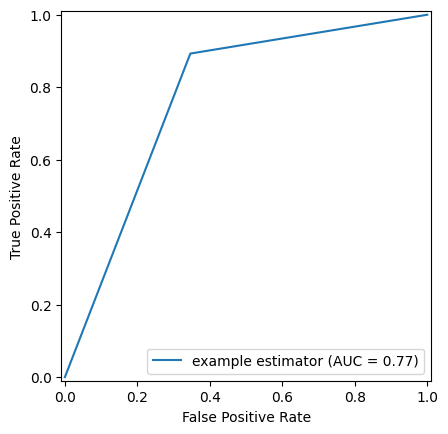

In [70]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_KNN)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [71]:
y_pred = (bay.predict_proba(X_test)[:,1] >= 0.5).astype(int) # set threshold as 0.3

In [72]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1])

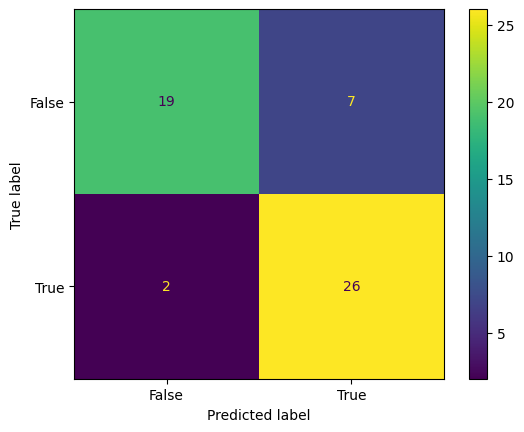

In [73]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()